In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Define path to your dataset
base_path = "/content/drive/MyDrive/Eye Protection YOLOv5"
train_images_dir = os.path.join(base_path, "train/images")
train_labels_dir = os.path.join(base_path, "train/labels")
val_images_dir = os.path.join(base_path, "valid/images")
val_labels_dir = os.path.join(base_path, "valid/labels")
test_images_dir = os.path.join(base_path, "test/images")
test_labels_dir = os.path.join(base_path, "test/labels")

# Check if dataset is visible
print("Train Images:", len(os.listdir(train_images_dir)))
print("Train Labels:", len(os.listdir(train_labels_dir)))
print("Validation Images:", len(os.listdir(val_images_dir)))
print("Validation Labels:", len(os.listdir(val_labels_dir)))
print("Test Images:", len(os.listdir(test_images_dir)))
print("Test Labels:", len(os.listdir(test_labels_dir)))


Train Images: 4400
Train Labels: 4400
Validation Images: 1256
Validation Labels: 1256
Test Images: 627
Test Labels: 627


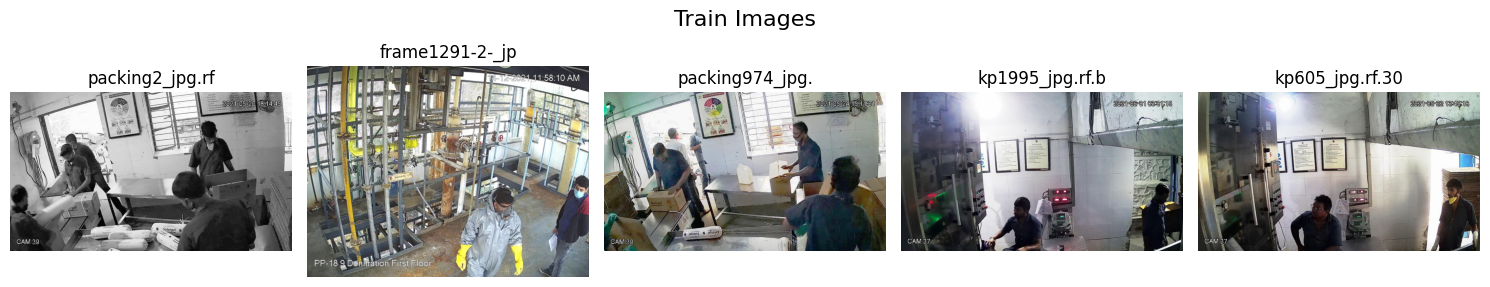

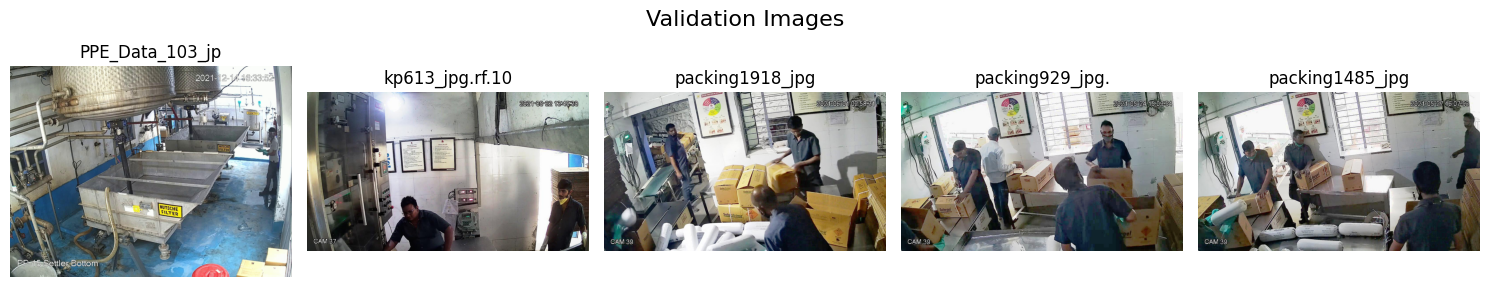

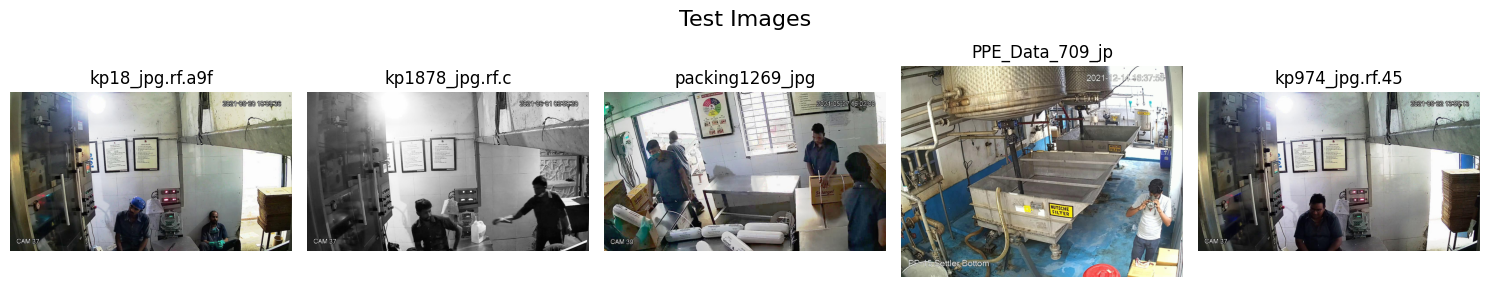

In [3]:
import matplotlib.pyplot as plt
import cv2
import random

def display_images_from_folder(folder_path, title, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    sample_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(15, 3))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(img_file[:15])
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display images
display_images_from_folder(train_images_dir, "Train Images")
display_images_from_folder(val_images_dir, "Validation Images")
display_images_from_folder(test_images_dir, "Test Images")

In [ ]:
!pip install albumentations --quiet
!pip install opencv-python-headless --quiet

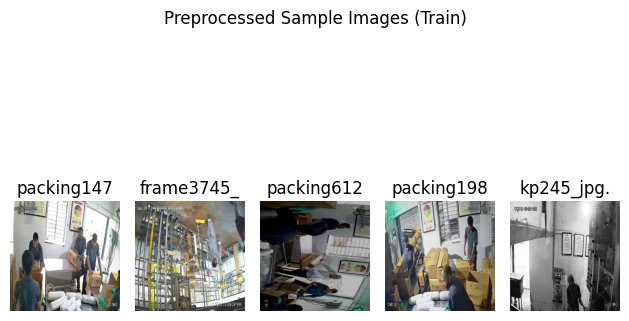

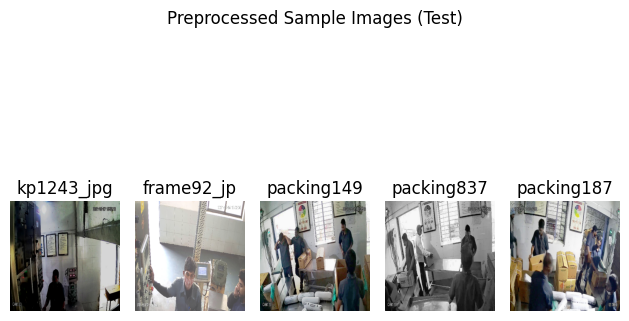

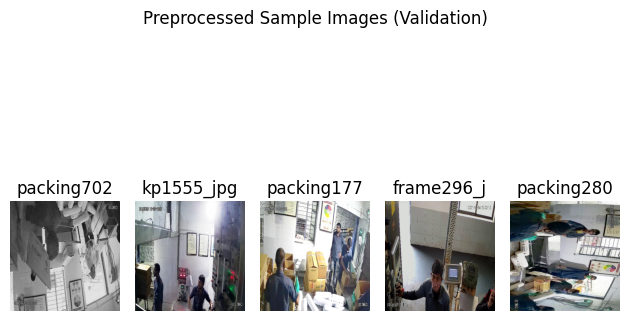

In [9]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import random

train_img_dir = os.path.join(base_path, 'train', 'images')
val_img_dir = os.path.join(base_path, 'valid', 'images')
test_img_dir = os.path.join(base_path, 'test', 'images')


# Albumentations preprocessing pipeline
transform = A.Compose([
    A.Resize(512, 512),                        # Resize to 512x512
    A.HorizontalFlip(p=0.5),                   # Random horizontal flip
    A.RandomRotate90(p=0.5),                   # Random 90-degree rotation
    A.RandomBrightnessContrast(p=0.5),         # Random brightness/contrast
    A.Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)),  # Normalize [0,1]
    ToTensorV2()
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Sample preprocessing function
def preprocess_and_display(image_dir,pr='',num_samples=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))

    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Dummy bounding box and class label (used only for visualization)
        dummy_bbox = [[0.5, 0.5, 0.3, 0.3]]  # YOLO format: x_center, y_center, width, height
        dummy_class = [0]

        transformed = transform(image=img, bboxes=dummy_bbox, class_labels=dummy_class)
        transformed_image = transformed['image'].permute(1, 2, 0).cpu().numpy()

        plt.subplot(1, num_samples, i+1)
        plt.imshow(transformed_image)
        plt.axis('off')
        plt.title(img_file[:10])

    plt.suptitle(pr)
    plt.tight_layout()
    plt.show()

# Run and visualize preprocessing
preprocess_and_display(train_img_dir,'Preprocessed Sample Images (Train)')
preprocess_and_display(test_img_dir,'Preprocessed Sample Images (Test)')
preprocess_and_display(val_img_dir,'Preprocessed Sample Images (Validation)')

In [ ]:
# Step 1: Install Ultralytics if not already installed
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00


In [ ]:
# Import required libraries
from ultralytics import YOLO
import torch

# Load the improved YOLOv5 'u' variant model
model = YOLO("yolov5su.pt")

# Set path to your Roboflow data.yaml (in your Google Drive)
data_yaml_path = "/content/drive/MyDrive/Eye Protection YOLOv5/data.yaml"

In [ ]:
# Train the model
model.train(
    data=data_yaml_path,
    epochs=5,
    imgsz=512,
    batch=16,
    name='eye_protection_yolov5',
    project='/content/runs/detect',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# Evaluate the model on the validation set
metrics = model.val()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 17.7M/17.7M [00:00<00:00, 168MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Eye Protection YOLOv5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5su.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=eye_protection_yolov5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

 19            [-1, 14]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 20                  -1  1    296448  ultralytics.nn.modules.block.C3              [256, 256, 1, False]          
 21                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 22            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 23                  -1  1   1182720  ultralytics.nn.modules.block.C3              [512, 512, 1, False]          
 24        [17, 20, 23]  1   2116822  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
YOLOv5s summary: 153 layers, 9,122,966 parameters, 9,122,950 gradients, 24.0 GFLOPs

Transferred 421/427 items from pretrained weights
Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 78.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.0 ms, read: 95.5±88.2 MB/s, size: 243.2 KB)


train: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/train/labels.cache... 4400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4400/4400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.9±6.1 ms, read: 58.3±32.5 MB/s, size: 140.0 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [00:00<?, ?it/s]


Plotting labels to /content/runs/detect/eye_protection_yolov5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/runs/detect/eye_protection_yolov5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.52G      2.125      2.669      1.138         35        512: 100%|██████████| 275/275 [02:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.51it/s]

                   all       1256       1686      0.744      0.749      0.817      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.82G      1.755       1.15      1.004         31        512: 100%|██████████| 275/275 [01:34<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]

                   all       1256       1686      0.752      0.821      0.851      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.85G      1.692       1.05     0.9867         39        512: 100%|██████████| 275/275 [01:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.65it/s]

                   all       1256       1686      0.813      0.856      0.903      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.85G       1.63     0.9576     0.9687         36        512: 100%|██████████| 275/275 [01:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]

                   all       1256       1686      0.867       0.88      0.942      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.88G      1.554     0.8428     0.9475         38        512: 100%|██████████| 275/275 [01:28<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]

                   all       1256       1686      0.842      0.904      0.954      0.545



5 epochs completed in 0.158 hours.
Optimizer stripped from /content/runs/detect/eye_protection_yolov5/weights/last.pt, 18.5MB
Optimizer stripped from /content/runs/detect/eye_protection_yolov5/weights/best.pt, 18.5MB

Validating /content/runs/detect/eye_protection_yolov5/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]


                   all       1256       1686      0.842      0.904      0.954      0.545
               Goggles        746        827      0.826      0.953      0.967      0.561
            NO-Goggles        679        859      0.858      0.856      0.941       0.53
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov5
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 45.1±24.8 MB/s, size: 129.5 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:23<00:00,  3.38it/s]


                   all       1256       1686      0.842      0.905      0.954      0.546
               Goggles        746        827      0.826      0.953      0.967      0.562
            NO-Goggles        679        859      0.858      0.858      0.941      0.529
Speed: 0.4ms preprocess, 3.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov52


In [ ]:
# Get mean metrics for YOLOv5 evaluation
mp, mr, map50, map5095 = metrics.box.mean_results()

print("Evaluation Results:")
print(f"Mean Precision (mp): {mp:.4f}")
print(f"Mean Recall (mr): {mr:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map5095:.4f}")

Evaluation Results:
Mean Precision (mp): 0.8418
Mean Recall (mr): 0.9052
mAP@50: 0.9538
mAP@50–95: 0.5455


In [ ]:
# Train the model with valid tunable hyperparameters
model.train(
    data=data_yaml_path,
    epochs=5,
    imgsz=512,
    batch=16,
    lr0=0.001,            # initial learning rate
    lrf=0.01,             # final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    copy_paste=0.0,
    name='eye_protection_yolov5_hp_tuned',
    project='/content/runs/detect',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

metrics = model.val()

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Eye Protection YOLOv5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5su.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=eye_protection_yolov5_hp_tuned3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

train: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/train/labels.cache... 4400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4400/4400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.0±2.8 ms, read: 48.5±18.0 MB/s, size: 140.0 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [00:00<?, ?it/s]


Plotting labels to /content/runs/detect/eye_protection_yolov5_hp_tuned3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/runs/detect/eye_protection_yolov5_hp_tuned3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.41G      1.765      1.532      1.014         35        512: 100%|██████████| 275/275 [02:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.60it/s]


                   all       1256       1686      0.819      0.802      0.897      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.59G      1.561      0.942     0.9515         31        512: 100%|██████████| 275/275 [01:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:14<00:00,  2.68it/s]

                   all       1256       1686      0.835      0.891      0.942      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.62G      1.532     0.8656     0.9454         39        512: 100%|██████████| 275/275 [01:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]

                   all       1256       1686      0.851      0.881      0.941      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.66G      1.488       0.82     0.9334         36        512: 100%|██████████| 275/275 [01:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:16<00:00,  2.48it/s]

                   all       1256       1686      0.884      0.889      0.957      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.66G      1.465      0.766     0.9265         38        512: 100%|██████████| 275/275 [01:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]

                   all       1256       1686       0.87      0.922      0.965      0.559



5 epochs completed in 0.161 hours.
Optimizer stripped from /content/runs/detect/eye_protection_yolov5_hp_tuned3/weights/last.pt, 18.5MB
Optimizer stripped from /content/runs/detect/eye_protection_yolov5_hp_tuned3/weights/best.pt, 18.5MB

Validating /content/runs/detect/eye_protection_yolov5_hp_tuned3/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:17<00:00,  2.31it/s]


                   all       1256       1686       0.87      0.922      0.965      0.559
               Goggles        746        827      0.872      0.948      0.973      0.577
            NO-Goggles        679        859      0.868      0.896      0.956       0.54
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov5_hp_tuned3
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 59.9±12.8 MB/s, size: 129.5 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:25<00:00,  3.07it/s]


                   all       1256       1686      0.871      0.922      0.964       0.56
               Goggles        746        827      0.874      0.948      0.973      0.579
            NO-Goggles        679        859      0.868      0.897      0.956      0.542
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov5_hp_tuned32


In [ ]:
# Get mean metrics for YOLOv5 evaluation
print("Evaluation Results:")
print(f"Mean Precision (mp): {mp:.4f}")
print(f"Mean Recall (mr): {mr:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map5095:.4f}")

Evaluation Results:
Mean Precision (mp): 0.8418
Mean Recall (mr): 0.9052
mAP@50: 0.9538
mAP@50–95: 0.5455


In [ ]:
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -q effdet timm albumentations opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Uninstall all versions first
!pip uninstall -y effdet
!pip uninstall -y efficientdet-pytorch  # Just in case
!rm -rf /usr/local/lib/python3.11/dist-packages/effdet*

# Install from official GitHub repo (includes DetBenchEval)
!pip install -q git+https://github.com/rwightman/efficientdet-pytorch.git

# Required imports
import torch
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet

print("EfficientDet components imported successfully (using DetBenchTrain)")

Found existing installation: effdet 0.4.1
Uninstalling effdet-0.4.1:
  Successfully uninstalled effdet-0.4.1
  Preparing metadata (setup.py) ... done
EfficientDet components imported successfully (using DetBenchTrain)


In [ ]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class details
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Transform
transform = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    ToTensorV2()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# Convert YOLO to Pascal VOC
def yolo_to_voc(box, img_w, img_h):
    x_c, y_c, w, h = box
    x_min = (x_c - w / 2) * img_w
    y_min = (y_c - h / 2) * img_h
    x_max = (x_c + w / 2) * img_w
    y_max = (y_c + h / 2) * img_h
    return [x_min, y_min, x_max, y_max]

# Dataset class
class EyeProtectionDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w = img.shape[:2]

        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    class_id, x_c, y_c, w, h = map(float, line.strip().split())
                    box = yolo_to_voc([x_c, y_c, w, h], img_w, img_h)
                    x_min, y_min, x_max, y_max = box
                    if x_max > x_min and y_max > y_min:
                        boxes.append(box)
                        labels.append(int(class_id))

        if self.transform:
            transformed = self.transform(image=img, bboxes=boxes, labels=labels)
            img = transformed['image']
            boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
            labels = torch.tensor(transformed['labels'], dtype=torch.int64)

        target = {'bbox': boxes, 'cls': labels}
        return img, target

# Dataset paths (assumes vars already defined: train_images_dir, etc.)
train_dataset = EyeProtectionDataset(train_images_dir, train_labels_dir, transform=transform)
val_dataset = EyeProtectionDataset(val_images_dir, val_labels_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [ ]:
# EfficientDet model
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = NUM_CLASSES
config.image_size = (512, 512)

net = EfficientDet(config, pretrained_backbone=True)
net.class_net = HeadNet(config, num_outputs=NUM_CLASSES)
model = DetBenchTrain(net, config).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
for epoch in range(5):
    model.train()
    total_loss = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images = torch.stack(images).to(device)
        boxes = [t['bbox'].to(device) for t in targets]
        labels = [t['cls'].to(device) for t in targets]

        targets_dict = {'bbox': boxes, 'cls': labels}

        optimizer.zero_grad()
        loss_dict = model(images, targets_dict)
        loss = loss_dict['loss']
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Epoch 1: 100%|██████████| 2200/2200 [07:05<00:00,  5.17it/s]


Epoch 1 Loss: 1728.7716


Epoch 2: 100%|██████████| 2200/2200 [06:24<00:00,  5.73it/s]


Epoch 2 Loss: 1193.6970


Epoch 3: 100%|██████████| 2200/2200 [06:22<00:00,  5.76it/s]


Epoch 3 Loss: 676.7660


Epoch 4: 100%|██████████| 2200/2200 [06:21<00:00,  5.77it/s]


Epoch 4 Loss: 334.2877


Epoch 5: 100%|██████████| 2200/2200 [06:23<00:00,  5.74it/s]

Epoch 5 Loss: 140.4632


In [ ]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Make sure model is in eval mode
model.eval()

all_preds = []
all_targets = []

# Confidence threshold for keeping predictions
CONF_THRESH = 0.1

with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Evaluating"):
        images = torch.stack(images).to(device)

        # Build dummy targets to pass into DetBenchTrain
        dummy_targets = {
            'bbox': [t['bbox'].to(device) for t in targets],
            'cls': [t['cls'].to(device) for t in targets],
            'img_scale': torch.ones(len(images)).to(device),
            'img_size': torch.tensor([[512, 512]] * len(images)).to(device)
        }

        # Get outputs from the training model (DetBenchTrain)
        outputs = model(images, dummy_targets)

        # Extract predictions from raw model output
        dets = outputs['detections'].cpu().numpy()  # shape: [B, 100, 6]

        for i in range(len(dets)):
            boxes = dets[i]
            preds = []
            for box in boxes:
                conf = box[4]
                class_id = int(box[5])

                # Skip low confidence or invalid class
                if conf > CONF_THRESH and class_id in [0, 1]:
                    preds.append(class_id)

            # If no predictions, add dummy class to avoid mismatch
            if len(preds) == 0:
                preds.append(1)  # Assume NO-Goggles as fallback

            true_labels = targets[i]['cls'].cpu().numpy().tolist()

            all_preds.extend(preds[:len(true_labels)])  # truncate if needed
            all_targets.extend(true_labels)

# Final unique class check
print("Unique predicted labels:", np.unique(all_preds))
print("Unique true labels:", np.unique(all_targets))

# Fix: Align the evaluation to valid labels
valid_labels = [0, 1]
CLASSES = ['Goggles', 'NO-Goggles']

print("\nClassification Report:")
print(classification_report(all_targets, all_preds, target_names=CLASSES, labels=valid_labels, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(all_targets, all_preds, labels=valid_labels))

Evaluating: 100%|██████████| 628/628 [01:03<00:00,  9.86it/s]

Unique predicted labels: [1]
Unique true labels: [0 1]

Classification Report:
              precision    recall  f1-score   support

     Goggles       1.00      0.00      0.00       827
  NO-Goggles       0.51      1.00      0.68       859

    accuracy                           0.51      1686
   macro avg       0.75      0.50      0.34      1686
weighted avg       0.75      0.51      0.34      1686


Confusion Matrix:
[[  0 827]
 [  0 859]]


In [ ]:
# EfficientDet configuration
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = NUM_CLASSES
config.image_size = (512, 512)

# Hyperparameter tuning
config.lr = 2e-4                  # Learning rate
config.momentum = 0.9            # Momentum (not used by AdamW but useful for SGD)
config.weight_decay = 0.0001     # Weight decay
config.grad_clip_norm = 1.0      # Gradient clipping
config.image_size = (512, 512)
config.warmup_epochs = 1         # Warmup before full LR
config.batch_norm_momentum = 0.99
config.batch_norm_eps = 1e-3

# Model setup
net = EfficientDet(config, pretrained_backbone=True)
net.class_net = HeadNet(config, num_outputs=NUM_CLASSES)
model = DetBenchTrain(net, config).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)

# Training loop
EPOCHS = 5  # You can tune this too
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images = torch.stack(images).to(device)
        boxes = [t['bbox'].to(device) for t in targets]
        labels = [t['cls'].to(device) for t in targets]

        targets_dict = {'bbox': boxes, 'cls': labels}

        optimizer.zero_grad()
        loss_dict = model(images, targets_dict)
        loss = loss_dict['loss']
        loss.backward()

        # Optional: gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), config.grad_clip_norm)

        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")

Epoch 1: 100%|██████████| 2200/2200 [1:02:15<00:00,  1.70s/it]


Epoch 1 Loss: 141.5359


Epoch 2: 100%|██████████| 2200/2200 [06:40<00:00,  5.50it/s]


Epoch 2 Loss: 0.4490


Epoch 3: 100%|██████████| 2200/2200 [06:36<00:00,  5.55it/s]


Epoch 3 Loss: 0.3961


Epoch 4: 100%|██████████| 2200/2200 [06:30<00:00,  5.63it/s]


Epoch 4 Loss: 0.3560


Epoch 5: 100%|██████████| 2200/2200 [06:29<00:00,  5.65it/s]

Epoch 5 Loss: 0.3309


In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Set model to evaluation mode
model.eval()

all_preds = []
all_targets = []

CONF_THRESH = 0.2  # Confidence threshold to accept predictions

with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Evaluating"):
        images = torch.stack(images).to(device)

        dummy_targets = {
            'bbox': [t['bbox'].to(device) for t in targets],
            'cls': [t['cls'].to(device) for t in targets],
            'img_scale': torch.ones(len(images)).to(device),
            'img_size': torch.tensor([[512, 512]] * len(images)).to(device)
        }

        # Get model predictions
        outputs = model(images, dummy_targets)
        dets = outputs['detections'].cpu().numpy()  # shape: [B, 100, 6]

        for i in range(len(dets)):
            boxes = dets[i]
            preds = []
            for box in boxes:
                conf = box[4]
                class_id = int(box[5])

                if conf > CONF_THRESH and class_id in [0, 1]:
                    preds.append(class_id)

            true_labels = targets[i]['cls'].cpu().numpy().tolist()
            num_true = len(true_labels)

            if len(preds) >= num_true:
                all_preds.extend(preds[:num_true])  # trim to match
            else:
            # pad predictions with most common class (e.g., 1 = NO-Goggles)
              pad = [1] * (num_true - len(preds))
              all_preds.extend(preds + pad)

            all_targets.extend(true_labels)


# Labels and class names
CLASSES = ['Goggles', 'NO-Goggles']
labels = [0, 1]

# Generate classification report
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=CLASSES, labels=labels, zero_division=1))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(all_targets, all_preds, labels=labels))

Evaluating: 100%|██████████| 628/628 [00:58<00:00, 10.75it/s]

Classification Report:
              precision    recall  f1-score   support

     Goggles       1.00      0.00      0.00       827
  NO-Goggles       0.51      1.00      0.68       859

    accuracy                           0.51      1686
   macro avg       0.75      0.50      0.34      1686
weighted avg       0.75      0.51      0.34      1686

Confusion Matrix:
[[  0 827]
 [  0 859]]


In [ ]:
import torch
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection.retinanet import RetinaNetClassificationHead

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class list
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Load pre-trained RetinaNet
model = retinanet_resnet50_fpn(weights="DEFAULT")

# Get in_channels and num_anchors from the existing head
in_channels = model.head.classification_head.cls_logits.in_channels
num_anchors = model.head.classification_head.num_anchors

# Replace classification head for our dataset
model.head.classification_head = RetinaNetClassificationHead(
    in_channels=in_channels,
    num_anchors=num_anchors,
    num_classes=NUM_CLASSES
)

# Move to device
model.to(device)
model.eval()

print("RetinaNet initialized and customized for 2-class object detection.")

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:03<00:00, 38.4MB/s]


RetinaNet initialized and customized for 2-class object detection.


In [ ]:
import os
import cv2
import torch
import time
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.optim as optim
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection.retinanet import RetinaNet_ResNet50_FPN_Weights

# Class setup
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Running on CPU")

# Albumentations transform
transform = A.Compose([
    A.Resize(256, 256),  # smaller size
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    ToTensorV2()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# YOLO to VOC converter
def yolo_to_voc(box, img_w, img_h):
    x_c, y_c, w, h = box
    x_min = (x_c - w / 2) * img_w
    y_min = (y_c - h / 2) * img_h
    x_max = (x_c + w / 2) * img_w
    y_max = (y_c + h / 2) * img_h
    return [x_min, y_min, x_max, y_max]

# Dataset class
class EyeProtectionDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w = img.shape[:2]

        boxes, labels = [], []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    class_id, x_c, y_c, w, h = map(float, line.strip().split())
                    box = yolo_to_voc([x_c, y_c, w, h], img_w, img_h)
                    if box[2] > box[0] and box[3] > box[1]:
                        boxes.append(box)
                        labels.append(int(class_id))

        if self.transform:
            transformed = self.transform(image=img, bboxes=boxes, labels=labels)
            img = transformed['image']
            boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
            labels = torch.tensor(transformed['labels'], dtype=torch.int64)

        target = {'boxes': boxes, 'labels': labels}
        return img, target

# Paths
train_images_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/train/images'
train_labels_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/train/labels'

# Dataloader
train_dataset = EyeProtectionDataset(train_images_dir, train_labels_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0, pin_memory=True,
                          collate_fn=lambda x: tuple(zip(*x)))

# Load RetinaNet with pretrained weights
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models import ResNet50_Weights

# Load RetinaNet with a pretrained ResNet50 backbone
backbone_weights = ResNet50_Weights.DEFAULT
model = retinanet_resnet50_fpn(weights=None, weights_backbone=backbone_weights, num_classes=NUM_CLASSES)
model = model.to(device)

Tesla T4


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


In [ ]:
# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
EPOCHS = 5
model.train()

for epoch in range(EPOCHS):
    start = time.time()
    total_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")

    for images, targets in loop:
        images = list(img.to(device) for img in images)

        # Convert to expected format
        target_list = []
        for t in targets:
            boxes = t['boxes'].to(device)
            labels = t['labels'].to(device)
            target_list.append({'boxes': boxes, 'labels': labels})

        # Forward + Backward pass
        loss_dict = model(images, target_list)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")
    print(f"Time taken: {(time.time() - start)/60:.2f} mins")


Tesla T4


Epoch 1: 100%|██████████| 2200/2200 [15:03<00:00,  2.44it/s, loss=0.35]


Epoch 1 Loss: 0.5958
Time taken: 15.05 mins


Epoch 2: 100%|██████████| 2200/2200 [14:40<00:00,  2.50it/s, loss=0.532]


Epoch 2 Loss: 0.3779
Time taken: 14.67 mins


Epoch 3: 100%|██████████| 2200/2200 [14:32<00:00,  2.52it/s, loss=0.423]


Epoch 3 Loss: 0.3199
Time taken: 14.55 mins


Epoch 4: 100%|██████████| 2200/2200 [14:28<00:00,  2.53it/s, loss=0.243]


Epoch 4 Loss: 0.2785
Time taken: 14.48 mins


Epoch 5: 100%|██████████| 2200/2200 [14:29<00:00,  2.53it/s, loss=0.19]

Epoch 5 Loss: 0.2462
Time taken: 14.49 mins


In [ ]:
# Validation dataset path
val_images_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/valid/images'
val_labels_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/valid/labels'

# Create validation dataset
val_dataset = EyeProtectionDataset(val_images_dir, val_labels_dir, transform=transform)

# Validation DataLoader
val_loader = DataLoader(
    val_dataset,
    batch_size=4,        # Adjust as needed
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=lambda x: tuple(zip(*x))
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

all_preds = []
all_trues = []

CONF_THRESH = 0.5  # Confidence threshold

model.eval()
with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Evaluating"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for i, output in enumerate(outputs):
            scores = output['scores'].cpu().numpy()
            labels = output['labels'].cpu().numpy()

            preds = labels[scores > CONF_THRESH].tolist()
            trues = targets[i]['labels'].cpu().numpy().tolist()

            # Fix prediction count mismatch
            if len(preds) < len(trues):
                preds.extend([1] * (len(trues) - len(preds)))  # Default to NO-Goggles
            elif len(preds) > len(trues):
                preds = preds[:len(trues)]  # Trim extra predictions

            all_preds.extend(preds)
            all_trues.extend(trues)

# Final Metrics
print("\nClassification Report:")
print(classification_report(all_trues, all_preds, target_names=CLASSES, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(all_trues, all_preds))

Evaluating: 100%|██████████| 314/314 [01:40<00:00,  3.13it/s]


Classification Report:
              precision    recall  f1-score   support

     Goggles       0.87      0.87      0.87       827
  NO-Goggles       0.88      0.88      0.88       859

    accuracy                           0.87      1686
   macro avg       0.87      0.87      0.87      1686
weighted avg       0.87      0.87      0.87      1686


Confusion Matrix:
[[719 108]
 [103 756]]
